<a href="https://colab.research.google.com/github/Ranjan4Kumar/Image_Classification/blob/main/Image_Classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Basic Image Classification: Classify Images of CLothings
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [17]:
print(tf.__version__)

2.9.2


In [19]:
# We will use Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution(28X28 pixels)
# Here 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly
# from Tensorflow.
import pandas as pd

''' We loaded the fashion_mnist dataset'''

fashion_mnist = tf.keras.datasets.fashion_mnist


In [21]:
(train_images , train_labels),(test_images , test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [23]:
# The images are 28X28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond of the class of clothing the image represents.

print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [24]:
# Each images is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images.

class_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress' , 'Coat' , 'Sandal' , 'Shirt','Sneaker','Bag','Ankle boot']

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
len(train_labels)

# Each label is an integer between 0 and 9

60000

### Preprocess The Data

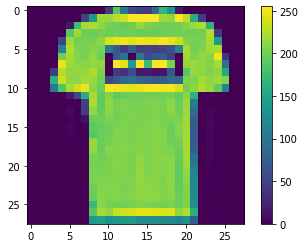

In [30]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training and the testing set be preprocessed in the same way

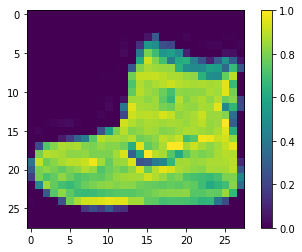

In [40]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training and the testing set be preprocessed in the same way

In [32]:
train_images = train_images/255.0
test_images = test_images/255.0

TO verify that the data is in the correct format and that you're ready to build and train the network, let's display the class anme below each image.

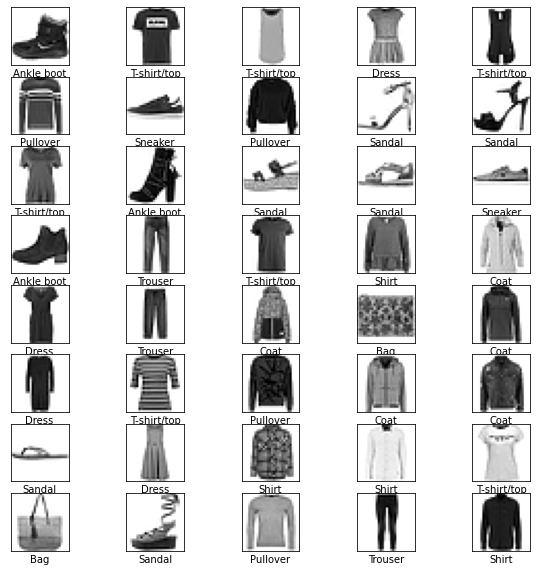

In [41]:
# plt.figure(figsize = (10,10))
# for i in range(40):
#   plt.subplot(8,5,i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(train_images[i], cmap=plt.cm.binary)
#   plt.xlabel(class_names[train_labels[i]])
# plt.show()

#                       OR

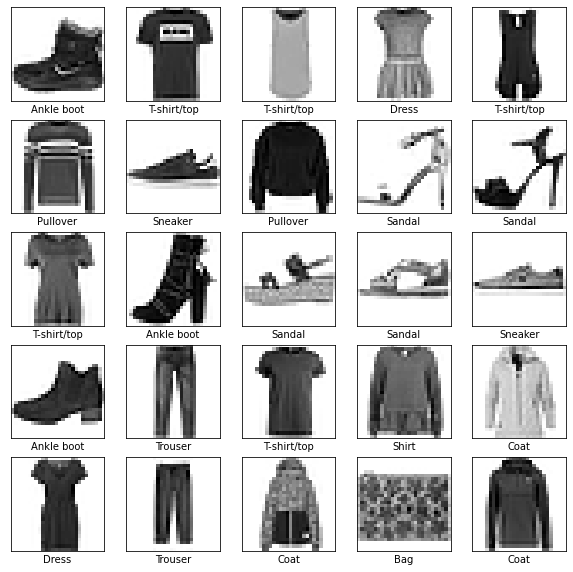

In [42]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [43]:
# Build the model

# Building the neural netwrok requires configuring the layers of the model, then compiling the model

## Set up the layers

The basic building block of a neural network is the layer. Layer extract representation from the data fed into them.
Hopefully, these representation are meaninful for the problem at hand

Most of the deep learning of cahining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The 1st layer in this network, tf.keras.layer.Flatten, transforms the format of the images from a two-dimesional array (of 28 by 28 pixels) to a one-dimensional array(of 28*28 = 784 pixels). think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameter to learn; it only reforms the data.


After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The 1st "Dense" layer has 128 nodes(or neurons). The second(and last) layer returns, a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.




### Compile the model
Before the model is ready for training, it needs few more settings. These are added during the models "Compile" step:

-> "Loss Function"-> This measnures how accurate the model is during training.You want to minimize this function to "steer" the model in the right direction.

-> Optimizer-> This is how the model is updated based on the data it seeds and its loss function.

-> Metrics-> Used to monitor the training and testing steps. The following example uses accracy, the fraction of the images that are correctly classified.

In [45]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

### Train the model

Training the neural network model requires the following steps.

1-> Feed the training data to the model. In this example, the training data is in the "train_images" and "train_labels" array.

2-> The models learn to associate images and labels.

3-> You ask the model to make predictions about a test set-in this example, the test_images array.

4-> Verify that the predictions match the labels from the "test_labels" array.


### Feed The Model

TO start training, call the model.fit method- so called because it "Fits the model to the training data.

In [47]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4988 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3729 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

As the model trains, the loss and accuracy metrics are displayed.This model reaches an accuracy of about 0.91(91%) on the training data.

## Evaluate accuracy
Next, compare how the model performs on the test dataset

In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3227 - accuracy: 0.8868 - 843ms/epoch - 3ms/step


The above result is showing that the accuracy on the test dataset is litle less than the accuracy on the training dataset. This gap between training accuracy and test accuracy reprsents "overfitting". Overfitting happens when a machine learning model performs worse on new, previously unseen than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following.

In [49]:
# Make predictions

'''
with the model trained, you can use it to make predictions about some images.Attach a softmax layer to convert the model's linear outputs-logits-to probabilities, 
whihc sjould be easier to interpret.
'''
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [51]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


 Here, the model has predicted the label for each image in the testing set. Let's take a look at the 1st prediction

In [52]:
predictions[0]

array([1.3503374e-05, 5.6925410e-06, 4.6624233e-08, 1.1248400e-09,
       8.4913863e-06, 1.2681890e-02, 1.6420718e-05, 3.3080086e-02,
       4.9074806e-05, 9.5414490e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "Confidence" that the image corresponds to each of the 10 different articles of clothing. you can see which label has the highest confidence value.

In [53]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test labels shows that this classfication is correct.

In [54]:
test_labels[0]

9

In [55]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the % (out of 100) for the predicted label.

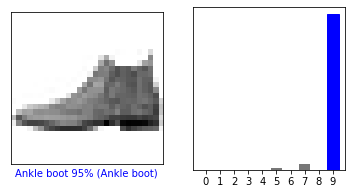

In [56]:
i =0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

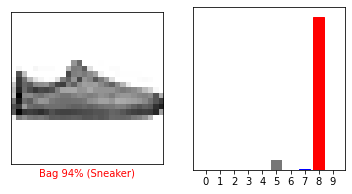

In [57]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions.Note that the model can be wrong even when very confident.


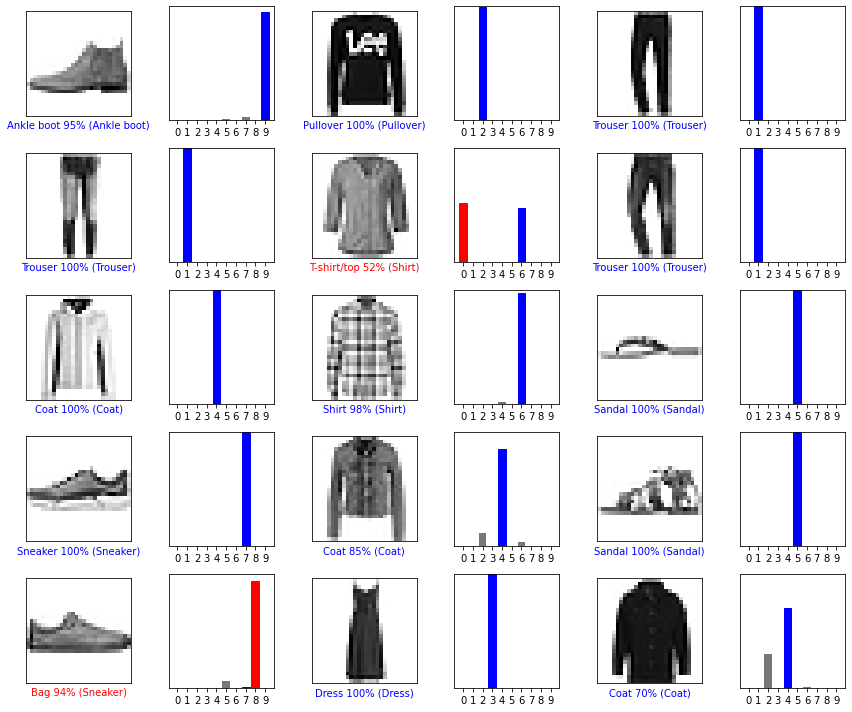

In [58]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [59]:
# Use the trained model

# Finally, use the trained model to make a preiction about a single image.

img= test_images[1]
print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you nedd to add it to a list

In [61]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [62]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[2.5816553e-05 7.3108721e-14 9.9541134e-01 3.2355616e-09 1.2426318e-03
  5.4743248e-11 3.3202218e-03 3.2454481e-18 2.3948786e-11 8.8375166e-15]]


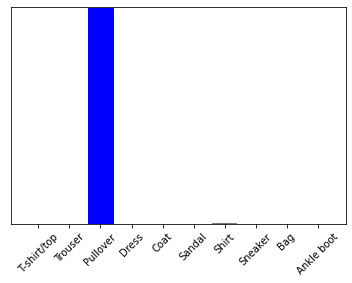

In [64]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names,rotation = 45)
plt.show()

tf.keras.Model.predict returns a list of list-one list for each image in the batch of data. Grab the predictions for our(only) image in the batch.

In [66]:
np.argmax(predictions_single[0])

2